In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('avocado.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
Total = data['4046'][0]+data['4225'][0]+data['4770'][0]+data['Total Bags'][0]
Total

64236.62

Total volume fetur4 is a sum of features 4046	,4225,	4770,	Total Bags                              
Total bgs is a sum of Small Bags,	Large Bags,	XLarge Bags	

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
data.shape

(18249, 13)

data frame has 18249 rows and 13 columns

In [7]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values in the dataset

In [8]:
data.describe().round(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


Observations:
    1. Average prices- minimum is 0.44 and the maximum is 3.25. theree are outliers in this feature
    2. Total Volume - minmum value is 84.56 and the maximum is 62505646.52. there are outliers and the feature is higly skewed
    3. PLU.4046 - minmum value is 0 and the maximum is 22743616.17. there are outliers and the feature is higly skewed
    4. PLU.4225 - minmum value is 0 and the maximum is 20470572.61. there are outliers and the feature is higly skewed                    
    5. PLU.4770 - minmum value is 0 and the maximum is 2546439.11. there are outliers and the feature is higly skewed
    6. Total bags - minmum value is 0 and the maximum is 19373134.37. there are outliers and the feature is higly skewed              
    7. Small Bags - minmum value is 0 and the maximum is 13384586.80. there are outliers and the feature is higly skewed
    8. Large Bags - minmum value is 0 and the maximum is 5719096.61. there are outliers and the feature is higly skewed
    9. XLarge Bags - minmum value is 0 and the maximum is 551693.65 there are outliers and the feature is higly skewed
    10. Data are from four years between 2015 to 2018
    

# EXPLORATORY DATA ANALYSIS

# Univariate Analysis

In [9]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [10]:
#chnging the data type od date feature to date nd time from object

data['Date']=pd.to_datetime(data['Date'])

lets create new columns to seperate month and year for a better visulization

In [11]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month

<AxesSubplot:xlabel='year', ylabel='count'>

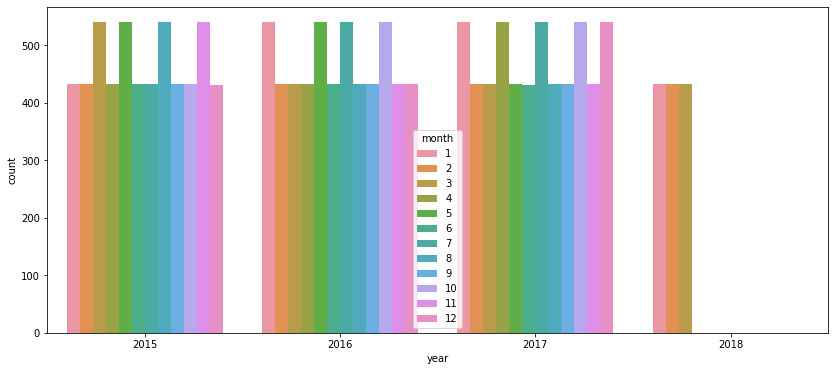

In [12]:
plt.figure(figsize=(14,6))
sns.countplot(x='year',hue='month',data=data)

data is distributes in all the months for all four years majorly, ther are high sales in few month in every year.               
nearly 400 rows are available from every month for ll four years except few months.                                       
given daata set has data for 1st three months in 2018

C:\Users\suren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

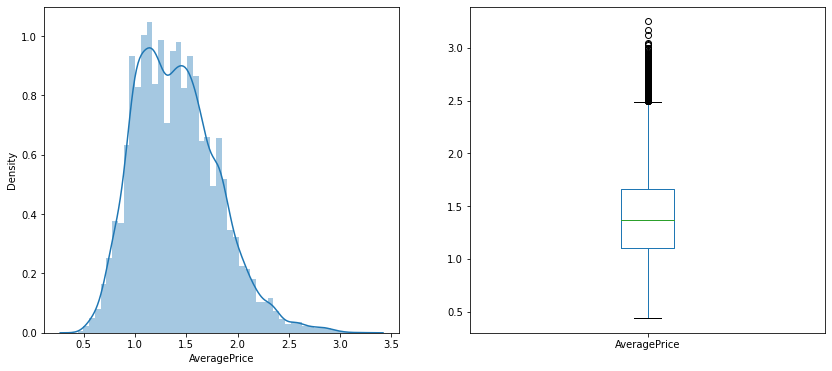

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['AveragePrice'])
plt.subplot(1,2,2)
data.AveragePrice.plot.box()

Average price data is skewed to the right and there are outliers in Average price feature

C:\Users\suren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

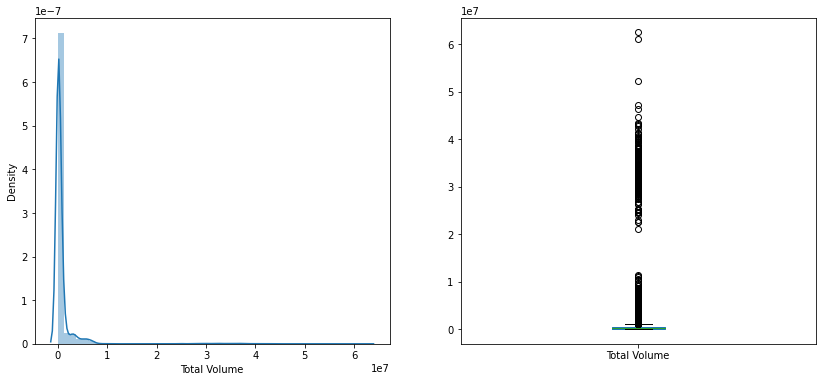

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['Total Volume'])
plt.subplot(1,2,2)
data['Total Volume'].plot.box()

Total volume column skewed to the right and there are outliers

C:\Users\suren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

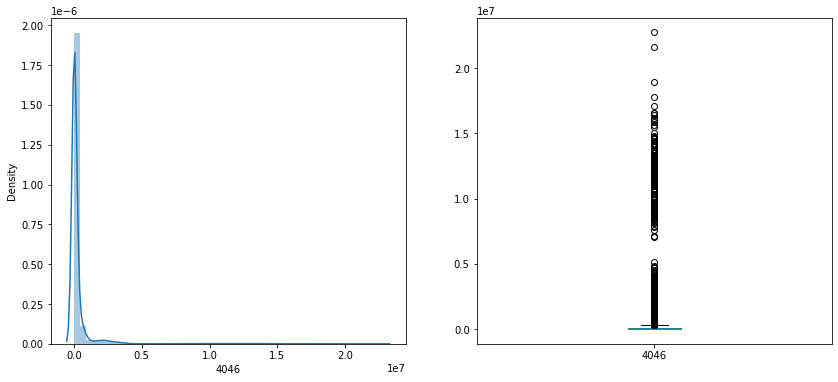

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['4046'])
plt.subplot(1,2,2)
data['4046'].plot.box()

feature 4046 skewed to the right and there are outliers

C:\Users\suren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

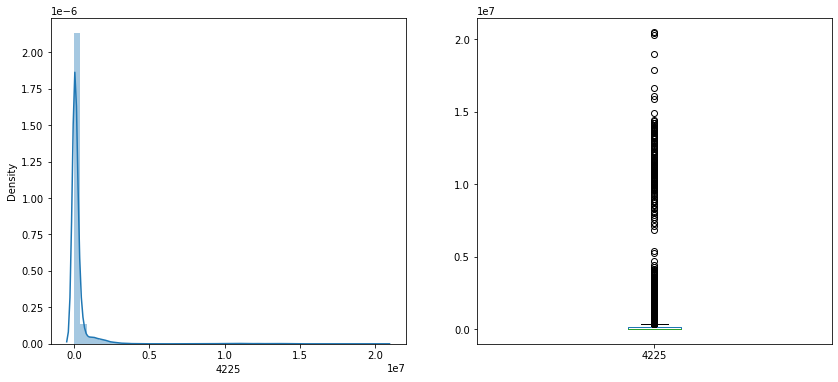

In [16]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['4225'])
plt.subplot(1,2,2)
data['4225'].plot.box()

feature 4225 skewed to the right and there are outliers

C:\Users\suren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

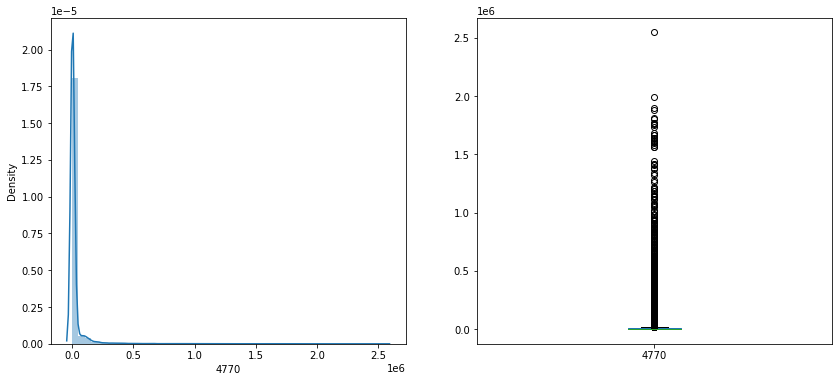

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['4770'])
plt.subplot(1,2,2)
data['4770'].plot.box()

feature 4770 skewed to the right and there are outliers

C:\Users\suren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

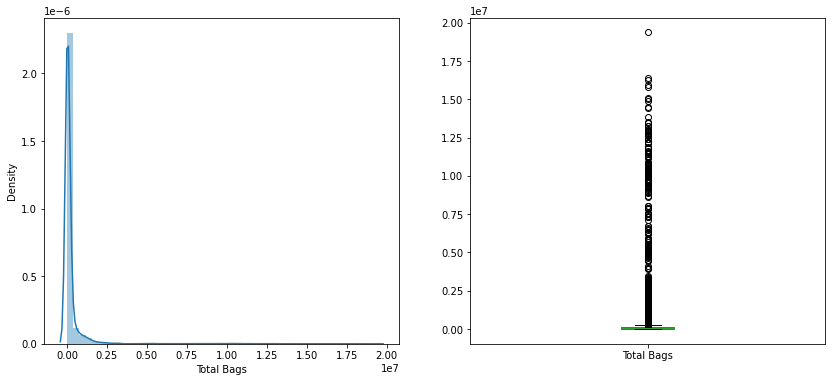

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['Total Bags'])
plt.subplot(1,2,2)
data['Total Bags'].plot.box()

Total bags feature skewed to the right and there are outliers

C:\Users\suren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

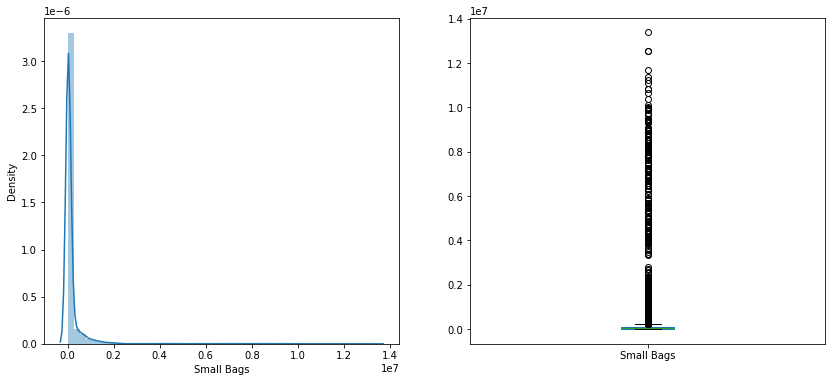

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['Small Bags'])
plt.subplot(1,2,2)
data['Small Bags'].plot.box()

Small bags feature is right skewd and there are outliers

C:\Users\suren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

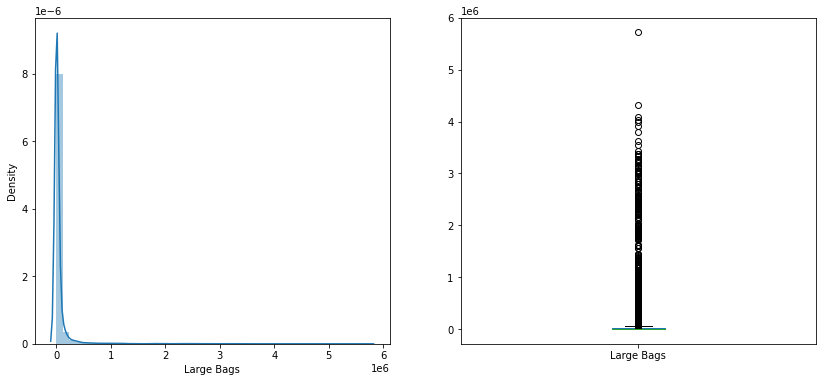

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['Large Bags'])
plt.subplot(1,2,2)
data['Large Bags'].plot.box()

Large bags feature is right skewd and there are outliers

C:\Users\suren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

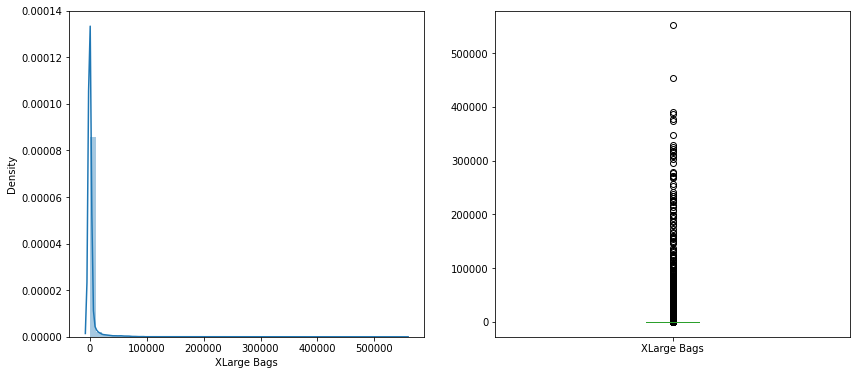

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(data['XLarge Bags'])
plt.subplot(1,2,2)
data['XLarge Bags'].plot.box()

XLarge bags feature is right skewd and there are outliers

C:\Users\suren\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='type', ylabel='count'>

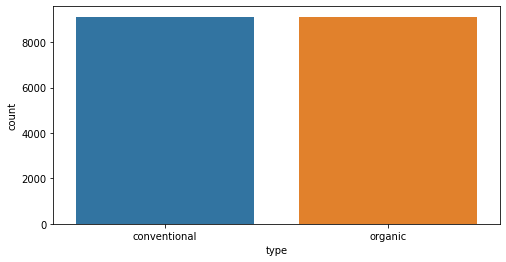

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(data['type'])

Conventional type and organic type avacado data is equaly distributed in the give data set

C:\Users\suren\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='region', ylabel='count'>

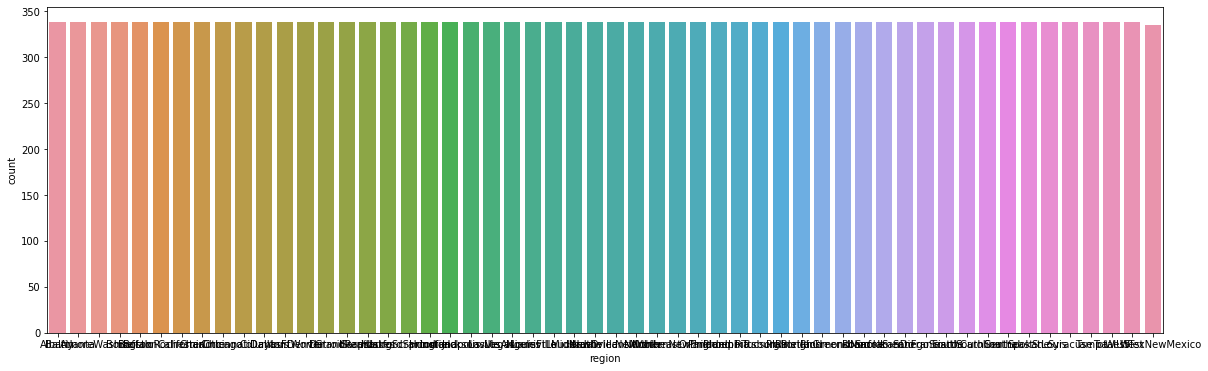

In [23]:
plt.figure(figsize=(20,6))
sns.countplot(data['region'])

given data set is equally distributed to all the regions except new mexico, data from New mexico is little lless from other regions

# Bivariate Analysis

In [24]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month'],
      dtype='object')

<Figure size 1008x576 with 0 Axes>

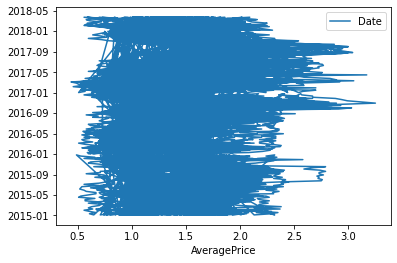

In [25]:
plt.figure(figsize=(14,8))
data.plot(x="AveragePrice", y="Date", kind="line")
plt.show()

In [26]:
data[data.AveragePrice == data.AveragePrice.max()]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
14125,2016-10-30,3.25,16700.94,2325.93,11142.85,0.0,3232.16,3232.16,0.0,0.0,organic,2016,SanFrancisco,10


Avacado sold at high average price on Sep'2016. Average price fell down in the year of 2018 between jan to May. Avacados average price was high in between 2016.09 to 2017.01 and 2017.09 to 2018.01.

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

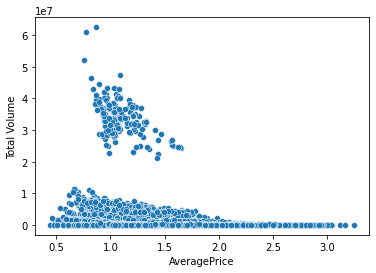

In [27]:
sns.scatterplot(x='AveragePrice',y='Total Volume', data=data)

Avacaod sold highly when the average price range was 0.5 to nely 1.5

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

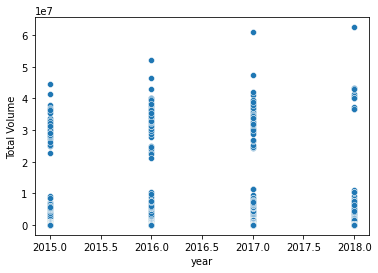

In [28]:
sns.scatterplot(x='year',y='Total Volume', data=data)

sale of avacado is gradually increased from 2015 to 2018

In [29]:
data[data['Total Volume'] == data['Total Volume'].max()]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
9097,2018-02-04,0.87,62505646.52,21620180.9,20445501.03,1066830.22,19373134.37,13384586.8,5719096.61,269450.96,conventional,2018,TotalUS,2


highest total value sale happend in the year of 2018 in region Total US

In [30]:
Regions=[]
for i in data.region:
    Regions.append(i)
tuple(Regions)
#data.region.value_counts()

('Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlant

In [31]:
pd.pivot_table(data, index= 'region', values= "Total Volume").sort_values(by='Total Volume', ascending=True)

,Total Volume
region,
Syracuse,3.237476e+04
Boise,4.264257e+04
Spokane,4.605111e+04
Albany,4.753787e+04
Louisville,4.762427e+04
Pittsburgh,5.564008e+04
BuffaloRochester,6.793630e+04
Roanoke,7.408879e+04
Jacksonville,8.517753e+04


top 5 rgions consumed more avcados are as follow:                            
Syracuse	3.237476e+04                      
Boise	4.264257e+04                     
Spokane	4.605111e+04                        
Albany	4.753787e+04                     
Louisville	4.762427e+04

In [32]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month'],
      dtype='object')

<AxesSubplot:xlabel='Total Volume', ylabel='4046'>

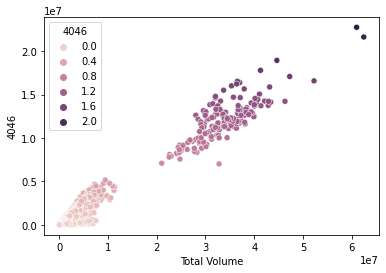

In [33]:
sns.scatterplot(x='Total Volume',y='4046',hue='4046',data=data)

<AxesSubplot:xlabel='Total Volume', ylabel='4225'>

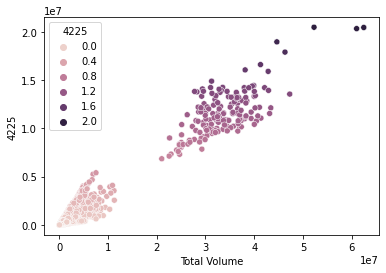

In [34]:
sns.scatterplot(x='Total Volume',y='4225',hue='4225',data=data)

<AxesSubplot:xlabel='Total Volume', ylabel='4770'>

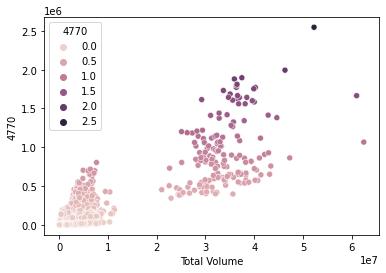

In [35]:
sns.scatterplot(x='Total Volume',y='4770',hue='4770',data=data)

PLU 4225 contribute high in total volume in the give dataset

<AxesSubplot:xlabel='Total Volume', ylabel='Total Bags'>

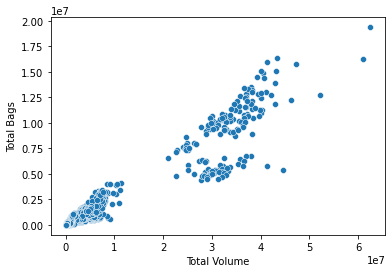

In [36]:
sns.scatterplot(x='Total Volume',y='Total Bags',data=data)

there is obvious positive correlation between Total bags and Total volume

<AxesSubplot:xlabel='Total Bags', ylabel='Small Bags'>

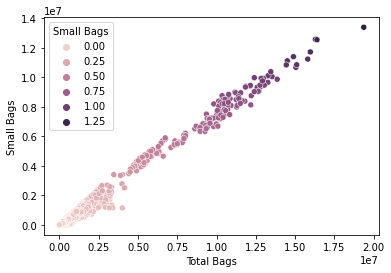

In [37]:
sns.scatterplot(x='Total Bags',y='Small Bags',hue='Small Bags',data=data)

<AxesSubplot:xlabel='Total Bags', ylabel='Large Bags'>

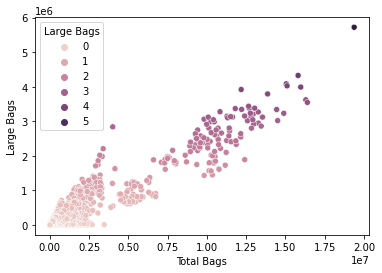

In [38]:
sns.scatterplot(x='Total Bags',y='Large Bags',hue='Large Bags',data=data)

<AxesSubplot:xlabel='Total Bags', ylabel='XLarge Bags'>

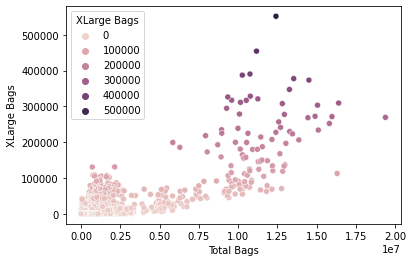

In [39]:
sns.scatterplot(x='Total Bags',y='XLarge Bags',hue='XLarge Bags',data=data)

Small Bags contribited highly in total bags features

In [40]:
pd.pivot_table(columns='type',values='Total Volume',data=data)

type,conventional,organic
Total Volume,1.653213e+06,47811.211453


conventional type Avcados are highly sold comparitive to Organic data

In [41]:
pd.pivot_table(columns='type',values='Total Bags',data=data)

type,conventional,organic
Total Bags,454390.130901,24817.654696


conventional type Avcados are highly sold comparitive to Organic type

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

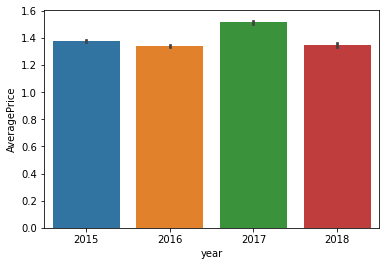

In [42]:
sns.barplot(x='year',y='AveragePrice',data=data)

Average price was high in the year of 2017

<AxesSubplot:xlabel='year', ylabel='Total Bags'>

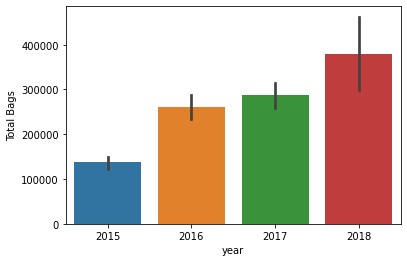

In [43]:
sns.barplot(x='year',y='Total Bags',data=data)

consumtption of avacado is grdully increased every year

In [44]:
data.groupby(['type'])['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

Cost of Oragnic avacados are high comparitive to conventional

# Multivaraite Analysis

In [45]:
#sns.pairplot(data)

In [46]:
data.columns



Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month'],
      dtype='object')

In [47]:
#dropping variables creates for EDA
data.drop('year',axis=1,inplace=True)
data.drop('month',axis=1,inplace=True)
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

<AxesSubplot:>

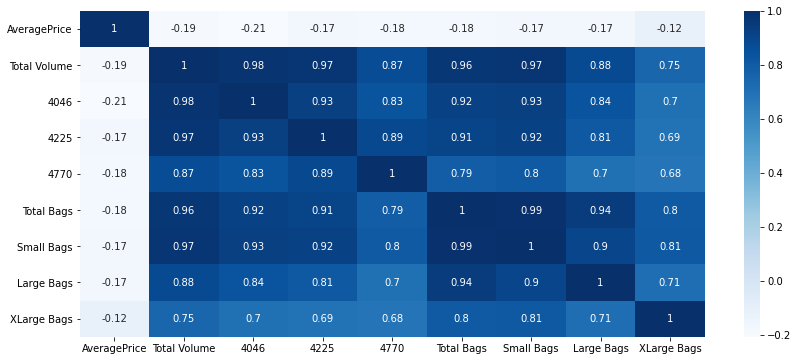

In [48]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

Every feature correlates well with each other, except AveragePrice feature                                                   


# OUTLIERS HANDLING

AveragePrice       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Total Volume    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
4046             AxesSubplot(0.44569,0.536818;0.133621x0.343182)
4225            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
4770            AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Total Bags            AxesSubplot(0.125,0.125;0.133621x0.343182)
Small Bags         AxesSubplot(0.285345,0.125;0.133621x0.343182)
Large Bags          AxesSubplot(0.44569,0.125;0.133621x0.343182)
XLarge Bags        AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

<Figure size 1080x720 with 0 Axes>

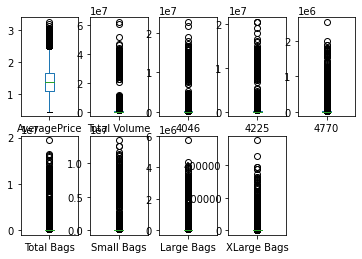

In [49]:
plt.figure(figsize=(15,10))
data.plot(kind='box',subplots=True,layout=(2,5))

all the numerical features are hving outliers, lets try with Zscore trnsformation technique to check the data loss

In [50]:
df=data.copy()

In [51]:
cols = list(df.columns)
cols.remove('Date')
cols.remove('type')
cols.remove('region')
cols

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

In [52]:
from scipy.stats import zscore

In [53]:
zscore_feature=[]
for i in cols:
    col=i+'Zscore'
    df[col]=(df[i]-df[i].mean())/df[i].std()
    zscore_feature.append(col)

df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region,AveragePriceZscore,Total VolumeZscore,4046Zscore,4225Zscore,4770Zscore,Total BagsZscore,Small BagsZscore,Large BagsZscore,XLarge BagsZscore
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,Albany,-0.188683,-0.227710,-0.230810,-0.199897,-0.212086,-0.234164,-0.232640,-0.222346,-0.175575
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,Albany,-0.139016,-0.230420,-0.231096,-0.208049,-0.211991,-0.233344,-0.231562,-0.222329,-0.175575
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,Albany,-1.182037,-0.212079,-0.231001,-0.154474,-0.211319,-0.234723,-0.233393,-0.222305,-0.175575
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,Albany,-0.809529,-0.223438,-0.230734,-0.185345,-0.211858,-0.237090,-0.236562,-0.222180,-0.175575
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,Albany,-0.312853,-0.231531,-0.230885,-0.208713,-0.211829,-0.236712,-0.236148,-0.221918,-0.175575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,...,WestTexNewMexico,0.556331,-0.241366,-0.230011,-0.243851,-0.212534,-0.229295,-0.226659,-0.220958,-0.175575
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,WestTexNewMexico,0.755002,-0.242289,-0.230687,-0.242271,-0.212534,-0.233588,-0.232189,-0.221397,-0.175575
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,WestTexNewMexico,1.152343,-0.242324,-0.230687,-0.243083,-0.205760,-0.233457,-0.231637,-0.222555,-0.175575
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,WestTexNewMexico,1.301346,-0.241618,-0.230422,-0.242645,-0.205769,-0.231859,-0.229536,-0.222523,-0.175575


In [54]:
##print('shape before dropping',df.shape)
##for i in zscore_feature:
  ##  for j in data[i]:
    ##    if j<3:
      ##      df = df[df[i] < 3]
##print('shape after dropping',df.shape)      

data loss for applying Zscoree transformation is nearly 2 %

AveragePrice             AxesSubplot(0.125,0.657941;0.110714x0.222059)
Total Volume          AxesSubplot(0.257857,0.657941;0.110714x0.222059)
4046                  AxesSubplot(0.390714,0.657941;0.110714x0.222059)
4225                  AxesSubplot(0.523571,0.657941;0.110714x0.222059)
4770                  AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Total Bags            AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Small Bags               AxesSubplot(0.125,0.391471;0.110714x0.222059)
Large Bags            AxesSubplot(0.257857,0.391471;0.110714x0.222059)
XLarge Bags           AxesSubplot(0.390714,0.391471;0.110714x0.222059)
AveragePriceZscore    AxesSubplot(0.523571,0.391471;0.110714x0.222059)
Total VolumeZscore    AxesSubplot(0.656429,0.391471;0.110714x0.222059)
4046Zscore            AxesSubplot(0.789286,0.391471;0.110714x0.222059)
4225Zscore                  AxesSubplot(0.125,0.125;0.110714x0.222059)
4770Zscore               AxesSubplot(0.257857,0.125;0.110714x0.222059)
Total 

<Figure size 1080x720 with 0 Axes>

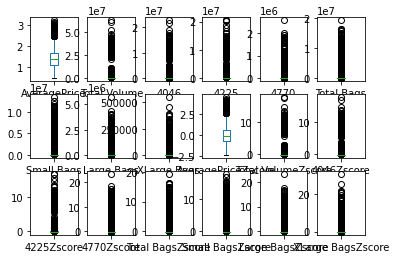

In [55]:
plt.figure(figsize=(15,10))
df.plot(kind='box',subplots=True,layout=(3,6))

but still outliers are not fixed., let try with IDR transformation technique by a common dynmic function

In [56]:
def iqrfunction(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    print("Q1 is: ",q1)
    print("Q3 is :",q3)
    print("IQR is ",IQR)
    lower_limit=q1-(1.5*IQR)
    higher_limit=q3+(1.5*IQR)
    print("lower range is ",lower_limit)
    print("Higher rnge is ",higher_limit)
    data[feature]=np.where(data[feature]<lower_limit,lower_limit,data[feature])
    data[feature]=np.where(data[feature]>higher_limit,higher_limit,data[feature])
    data[feature].plot.box()

Q1 is:  1.1
Q3 is : 1.66
IQR is  0.5599999999999998
lower range is  0.26000000000000034
Higher rnge is  2.4999999999999996


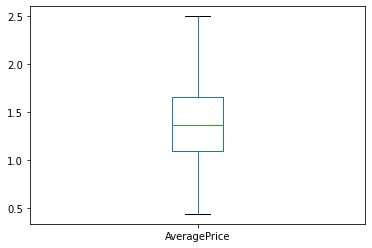

In [57]:
iqrfunction('AveragePrice')

Q1 is:  10838.58
Q3 is : 432962.29
IQR is  422123.70999999996
lower range is  -622346.985
Higher rnge is  1066147.855


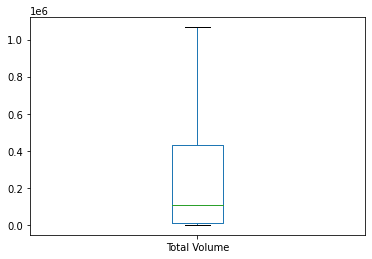

In [58]:
iqrfunction('Total Volume')

Q1 is:  854.07
Q3 is : 111020.2
IQR is  110166.12999999999
lower range is  -164395.12499999997
Higher rnge is  276269.39499999996


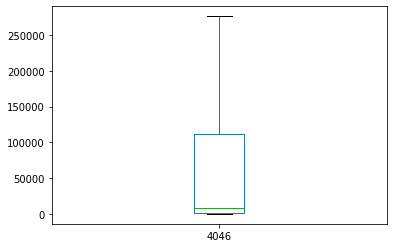

In [59]:
iqrfunction('4046')

Q1 is:  3008.78
Q3 is : 150206.86
IQR is  147198.08
lower range is  -217788.34
Higher rnge is  371003.98


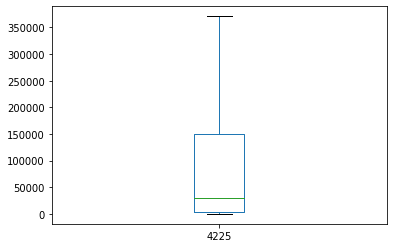

In [60]:
iqrfunction('4225')

Q1 is:  0.0
Q3 is : 6243.42
IQR is  6243.42
lower range is  -9365.130000000001
Higher rnge is  15608.550000000001


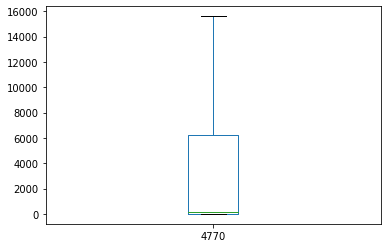

In [61]:
iqrfunction('4770')

Q1 is:  5088.64
Q3 is : 110783.37
IQR is  105694.73
lower range is  -153453.455
Higher rnge is  269325.46499999997


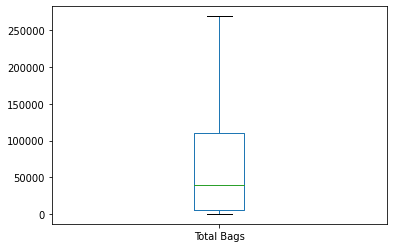

In [62]:
iqrfunction('Total Bags')

Q1 is:  2849.42
Q3 is : 83337.67
IQR is  80488.25
lower range is  -117882.955
Higher rnge is  204070.04499999998


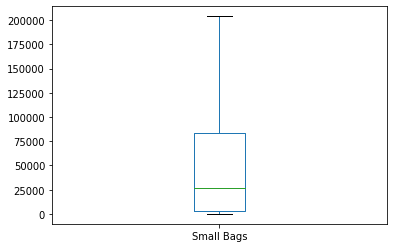

In [63]:
iqrfunction('Small Bags')

Q1 is:  127.47
Q3 is : 22029.25
IQR is  21901.78
lower range is  -32725.199999999997
Higher rnge is  54881.92


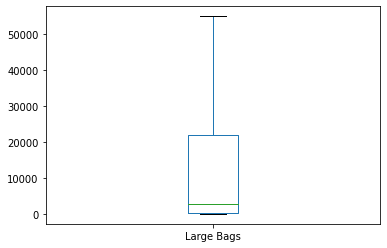

In [64]:
iqrfunction('Large Bags')

Q1 is:  0.0
Q3 is : 132.5
IQR is  132.5
lower range is  -198.75
Higher rnge is  331.25


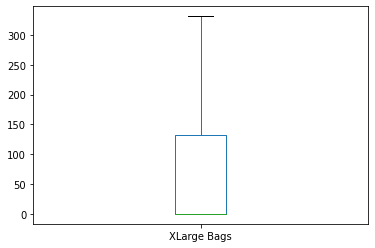

In [65]:
iqrfunction('XLarge Bags')

AveragePrice       AxesSubplot(0.125,0.657941;0.133621x0.222059)
Total Volume    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
4046             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
4225            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
4770            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Total Bags         AxesSubplot(0.125,0.391471;0.133621x0.222059)
Small Bags      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Large Bags       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
XLarge Bags     AxesSubplot(0.606034,0.391471;0.133621x0.222059)
dtype: object

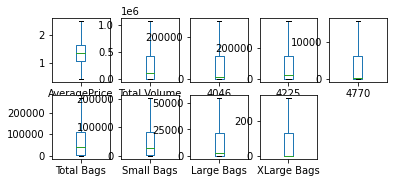

In [66]:
data.plot(kind='box',subplots=True, layout=(3,5))

Now the outiers in all the features are fixed lets check for the skeness and correct if any.

# SKEWNESS

In [67]:
data.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
AveragePrice,0.453073,-0.177675
Total Volume,1.206542,-0.041277
4046,1.251184,-0.012196
4225,1.219271,-0.117764
4770,1.212184,-0.288169
Total Bags,1.158550,-0.097424
Small Bags,1.186103,0.011987
Large Bags,1.215301,-0.184294
XLarge Bags,1.175351,-0.544345


all the features except Average price are skewed and teh skewness is positve lets try with boxcox transformation.

In [68]:
df=data.copy()

In [69]:
df['Total Volume']=np.log1p(df['Total Volume'])
df['Total Volume'].skew()

-0.286614643624633

In [70]:
df['4046']=np.log1p(df['4046'])
df['4046'].skew()

-0.6402003632406159

In [71]:
#from scipy.stats import boxcox

In [72]:
#df['4046']=boxcox(df['4046'],0)

In [73]:
df['4225']=np.sqrt(df['4225'])
df['4225'].skew()

0.7081237601158662

In [74]:
df['4770']=np.log1p(df['4770'])
df['4770'].skew()

-0.10118317848996497

In [75]:
df['Total Bags']=np.sqrt(df['Total Bags'])
df['Total Bags'].skew()

0.5412504518997184

In [76]:
df['Small Bags']=np.sqrt(df['Small Bags'])
df['Small Bags'].skew()

0.5311217758565909

In [77]:
df['Large Bags']=np.sqrt(df['Large Bags'])
df['Large Bags'].skew()

0.7371412540828215

In [78]:
df['XLarge Bags']=np.log1p(df['XLarge Bags'])
df['XLarge Bags'].skew()

0.8683955264513595

In [79]:
df.skew()

AveragePrice    0.453073
Total Volume   -0.286615
4046           -0.640200
4225            0.708124
4770           -0.101183
Total Bags      0.541250
Small Bags      0.531122
Large Bags      0.737141
XLarge Bags     0.868396
dtype: float64

C:\Users\suren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

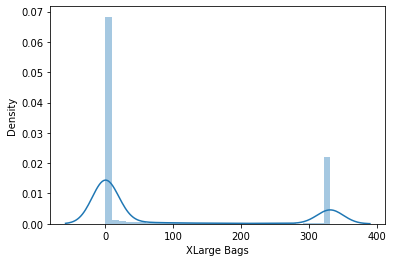

In [80]:
sns.distplot(data['XLarge Bags'])

C:\Users\suren\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

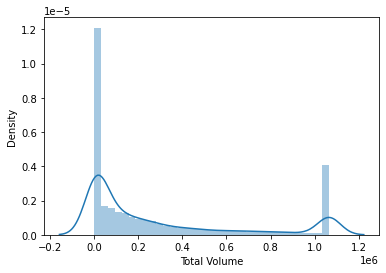

In [81]:
sns.distplot(data['Total Volume'])

In [82]:
#from sklearn.preprocessing import PowerTransformer

In [83]:
#power = PowerTransformer(method='yeo-johnson', standardize=True)
#data_trans = power.fit_transform(data)

Treid removing the skewness using all the techniques, and kept the best trnsformed skewwness for further process

# LABEL ENCODING

In [84]:
from sklearn.preprocessing import LabelEncoder

In [143]:
df_new=df.copy()

In [144]:
encoder=LabelEncoder()
df_new=df.apply(encoder.fit_transform)
df_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,51,86,7931,4383,10872,1400,5780,5782,1264,0,0,0
1,50,88,7645,3616,10213,1570,6013,5972,1288,0,0,0
2,49,46,9388,3891,12864,2516,5616,5625,1328,0,0,0
3,48,61,8374,4545,11751,1789,4727,4880,1513,0,0,0
4,47,81,7540,4201,10157,1836,4874,4985,1855,0,0,0


Now the categorical features are encoded, lets move the categorical features to the original data frame.

In [145]:
df['Date']=df_new['Date']
df['type']=df_new['type']
df['region']=df_new['region']

In [146]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,51,1.33,11.070344,6.944801,233.355630,3.895080,93.257010,92.755701,9.656604,0.0,0,0
1,50,1.35,10.912867,6.515127,211.278986,4.083115,97.496461,96.995206,9.873702,0.0,0,0
2,49,0.93,11.680313,6.679222,330.378071,4.879007,90.251593,89.678370,10.155787,0.0,0,0
3,48,1.08,11.277116,7.032624,268.284196,4.298373,76.230965,75.348524,11.565466,0.0,0,0
4,47,1.28,10.840377,6.848515,209.376193,4.340944,78.638095,77.370925,14.060228,0.0,0,0


Now the encoded values are moved to the processed dataframe., lets perform standard scaling technique.

# standardization

Now i am going to standardise the dataset using standard scaler to reduce the Euclidean distance between the featureesin the given dataset 

In [147]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [148]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
df_scaled

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,-0.676360,-0.186305,-0.050181,-0.602502,-0.006273,-0.244967,-0.778720,-0.656270,-0.890580,-0.684528,-0.999836,-1.700252
1,-0.696857,-0.135726,-0.126566,-0.741391,-0.111946,-0.195804,-0.753376,-0.627452,-0.888008,-0.684528,-0.999836,-1.700252
2,-0.717355,-1.197899,0.245688,-0.688348,0.458137,0.012292,-0.796687,-0.677189,-0.884667,-0.684528,-0.999836,-1.700252
3,-0.737853,-0.818551,0.050115,-0.574114,0.160917,-0.139522,-0.880502,-0.774598,-0.867968,-0.684528,-0.999836,-1.700252
4,-0.758350,-0.312755,-0.161728,-0.633626,-0.121054,-0.128391,-0.866112,-0.760850,-0.838416,-0.684528,-0.999836,-1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.578371,0.572389,-0.692844,-0.382762,-0.936079,-1.263381,-0.641663,-0.509751,-0.758805,-0.684528,1.000164,1.700811
18245,1.557874,0.774708,-0.793039,-0.557515,-0.842864,-1.263381,-0.760804,-0.644061,-0.791484,-0.684528,1.000164,1.700811
18246,1.537376,1.179345,-0.797293,-0.557455,-0.886199,0.460067,-0.756803,-0.629426,-0.927917,-0.684528,1.000164,1.700811
18247,1.516879,1.331084,-0.718197,-0.477301,-0.861915,0.459733,-0.710101,-0.576460,-0.921207,-0.684528,1.000164,1.700811


In [149]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

# MODEL SELECTION AND TRAIN TEST SPLIT

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [151]:
best_score=0
best_random_state=0

for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    LR_pred=LR.predict(x_test)
    r2score=r2_score(y_test,LR_pred)
    if r2score>best_score:
        best_score=r2score
        best_random_state=i
print('Best score is : {}, at randome state {}'.format(best_score,best_random_state))

Best score is : 0.5213113810561436, at randome state 69


In [152]:
# y_test

In [153]:
LR.coef_

array([ 9.91267791e-02, -1.51510152e-01,  2.46979211e-02,  1.42284972e-01,
        4.76380169e-02, -3.44109387e-01,  2.00886937e-01,  2.80624807e-03,
        2.73738589e-04,  1.80188918e-01,  6.82507197e-03])

In [154]:
LR.intercept_

1.4032560661248465

linear regression LR score is 52%

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=69)

now the data set is splitted into train and test , now i am applying standard scaling technique to reeduce the noise in the data set due to highvaraince in the features

# Linear Regression

In [156]:
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
r2score=r2_score(y_test,LR_pred)

print('R2score is : ',r2score)
print('')
print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test, LR_pred))
print('Mean squared error: ', mean_squared_error(y_test,LR_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,LR_pred)))


R2score is :  0.5213113810561436

Errors:
mean Absolute error:  0.21522575537611438
Mean squared error:  0.07529339203863764
Root mean squared error:  0.2743964140411416


Accuracy of liner regression is 52%, lets try with few more models to find the best model for this problem statement

In [157]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [158]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)

r2score=r2_score(y_test,RFR_pred)

print('R2score is : ',r2score)
print('')
print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test, RFR_pred))
print('Mean squared error: ', mean_squared_error(y_test,RFR_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,RFR_pred)))

R2score is :  0.9176365545756192

Errors:
mean Absolute error:  0.08091013698630137
Mean squared error:  0.01295502533499377
Root mean squared error:  0.11382014468007748


Random forest gives the r2 score of 91%

In [159]:
ADA=AdaBoostRegressor()
ADA.fit(x_train,y_train)
ADA_pred=ADA.predict(x_test)

r2score=r2_score(y_test,ADA_pred)

print('R2score is : ',r2score)
print('')
print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test, ADA_pred))
print('Mean squared error: ', mean_squared_error(y_test,ADA_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,ADA_pred)))

R2score is :  0.6249904988934248

Errors:
mean Absolute error:  0.19472275479963874
Mean squared error:  0.05898560414352141
Root mean squared error:  0.24286952082038085


ADA boost regressor gives the r2 score of 62%

In [160]:
from sklearn.neighbors import KNeighborsRegressor

In [161]:
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train,y_train)
KNN_pred=KNN.predict(x_test)
r2score=r2_score(y_test,KNN_pred)

print('R2score is : ',r2score)
print('')
print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test, KNN_pred))
print('Mean squared error: ', mean_squared_error(y_test,KNN_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,KNN_pred)))

R2score is :  0.8911249422595803

Errors:
mean Absolute error:  0.08944582814445828
Mean squared error:  0.017125062266500624
Root mean squared error:  0.13086276119087745


KNN gives accuracy of 89%

# CROSS VALIDATION

In [162]:
from sklearn.model_selection import cross_val_score

In [163]:
print("Linear regression cross validation accuracy is :", cross_val_score(LR,x,y,cv=5).mean())

Linear regression cross validation accuracy is : 0.09759977371856783


In [164]:
print("Random forest regressor cross validation accuracy is :", cross_val_score(RFR,x,y,cv=5).mean())

Random forest regressor cross validation accuracy is : 0.42011489980573014


In [165]:
print("ADA boost regressor cross validation accuracy is :", cross_val_score(ADA,x,y,cv=5).mean())

ADA boost regressor cross validation accuracy is : 0.14227548556222497


In [166]:
print("KNN cross validation accuracy is :", cross_val_score(KNN,x,y,cv=5).mean())

KNN cross validation accuracy is : 0.14087732707266928


Best performing model is KNN, lets to hyper parameter tunning

# HYPER PARAMETER TUNNING

In [167]:
from sklearn.model_selection import GridSearchCV

In [170]:
parameters={'n_neighbors':range(1,30),'weights':['uniform', 'distance']}
gsc=GridSearchCV(KNN,parameters)
gsc.fit(x_train,y_train)
gsc

GridSearchCV(estimator=KNeighborsRegressor(n_neighbors=2),
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']})

In [171]:
print(gsc.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


In [172]:
fin_model=KNeighborsRegressor(n_neighbors=2)
fin_model.fit(x_train,y_train)
fin_model_pred=fin_model.predict(x_test)
r2score=r2_score(y_test,fin_model_pred)

print('R2score is : ',r2score)
print('')
print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test, KNN_pred))
print('Mean squared error: ', mean_squared_error(y_test,KNN_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,KNN_pred)))

R2score is :  0.8911249422595803

Errors:
mean Absolute error:  0.08944582814445828
Mean squared error:  0.017125062266500624
Root mean squared error:  0.13086276119087745


In [173]:
result=pd.DataFrame({})
result['predicted']=KNN_pred
result['Actual']=list(y_test)
result.head()

,predicted,Actual
0,2.010,2.09
1,1.735,1.73
2,0.895,0.95
3,1.265,1.29
4,1.100,1.14


<AxesSubplot:xlabel='predicted', ylabel='Actual'>

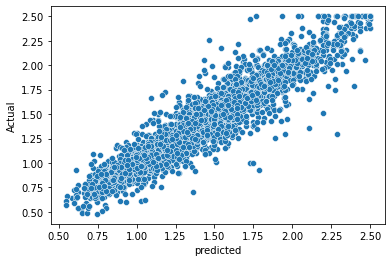

In [174]:
sns.scatterplot(x='predicted',y='Actual',data=result)

best performing model is KNN regressor and the accuracy is 89.11%

# SAVING THE MODEL

In [178]:
import joblib

joblib.dump(fin_model,'fin_model.pkl')

['fin_model.pkl']